<a href="https://colab.research.google.com/github/izzalia89/UTS_PENGOLAHAN_CITRA_DIGITAL/blob/main/no1_no2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

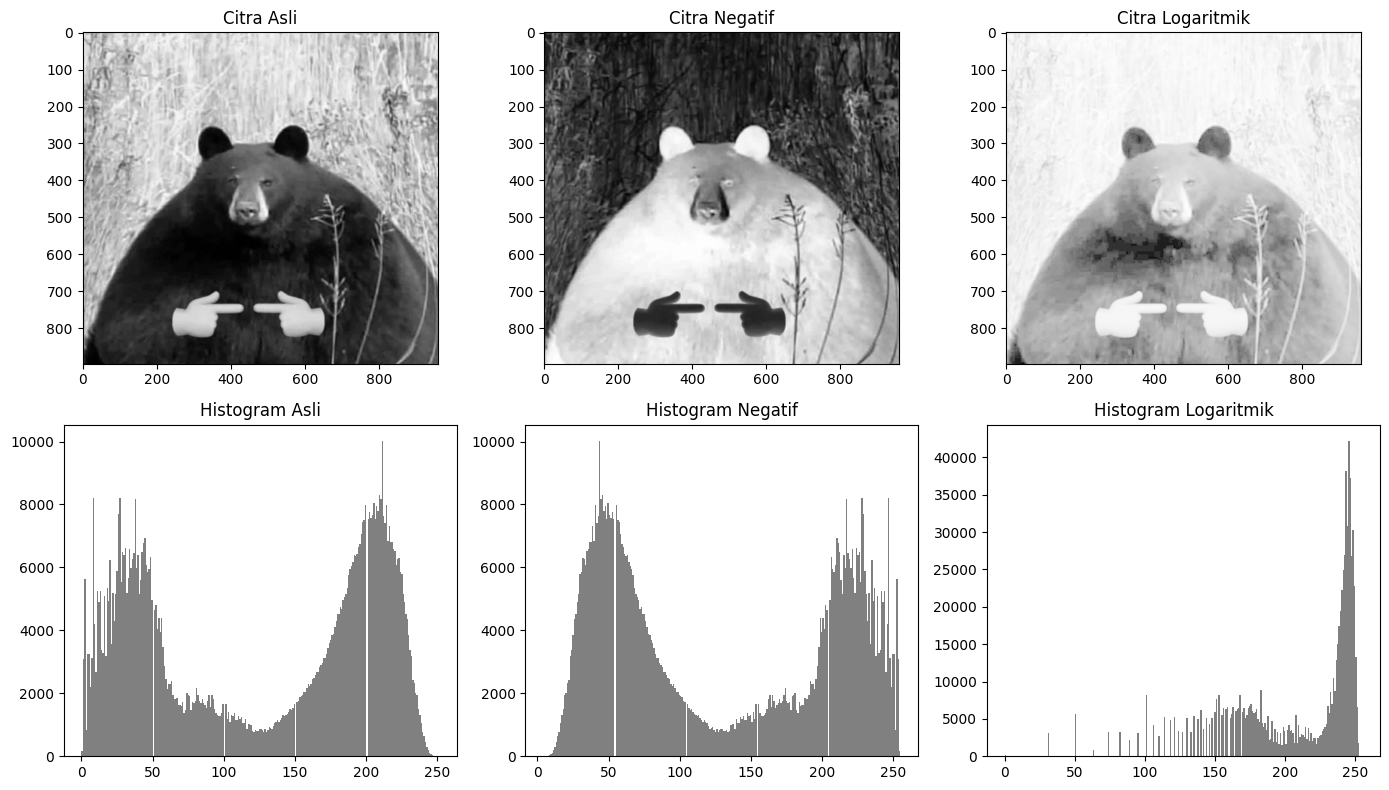

Rata-rata nilai keabuan:
Asli      : 126.08
Negatif   : 128.92
Logaritmik: 206.43


In [ ]:
# ======================================
# SOAL 1 - Transformasi Citra Digital
# ======================================
# Nama: (Izzatul Amaliyah)
# NIM: (23423038)
# UTS Pengolahan Citra Digital - 2025/2026

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra grayscale
img = cv2.imread('bear.jpeg', cv2.IMREAD_GRAYSCALE)

# 2. Transformasi negatif
negatif = 255 - img

# 3. Transformasi logaritmik
c = 255 / np.log(1 + np.max(img))
log_transform = c * np.log(1 + img)
log_transform = np.array(log_transform, dtype=np.uint8)

# 4. Tampilkan citra & histogram
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# Citra asli
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Citra Asli')
axes[1, 0].hist(img.ravel(), bins=256, color='gray')
axes[1, 0].set_title('Histogram Asli')

# Citra negatif
axes[0, 1].imshow(negatif, cmap='gray')
axes[0, 1].set_title('Citra Negatif')
axes[1, 1].hist(negatif.ravel(), bins=256, color='gray')
axes[1, 1].set_title('Histogram Negatif')

# Citra logaritmik
axes[0, 2].imshow(log_transform, cmap='gray')
axes[0, 2].set_title('Citra Logaritmik')
axes[1, 2].hist(log_transform.ravel(), bins=256, color='gray')
axes[1, 2].set_title('Histogram Logaritmik')

plt.tight_layout()
plt.show()

# Simpan hasil
cv2.imwrite('hasil_negatif.jpg', negatif)
cv2.imwrite('hasil_log.jpg', log_transform)

# Analisa otomatis nilai keabuan (optional)
print("Rata-rata nilai keabuan:")
print(f"Asli      : {np.mean(img):.2f}")
print(f"Negatif   : {np.mean(negatif):.2f}")
print(f"Logaritmik: {np.mean(log_transform):.2f}")


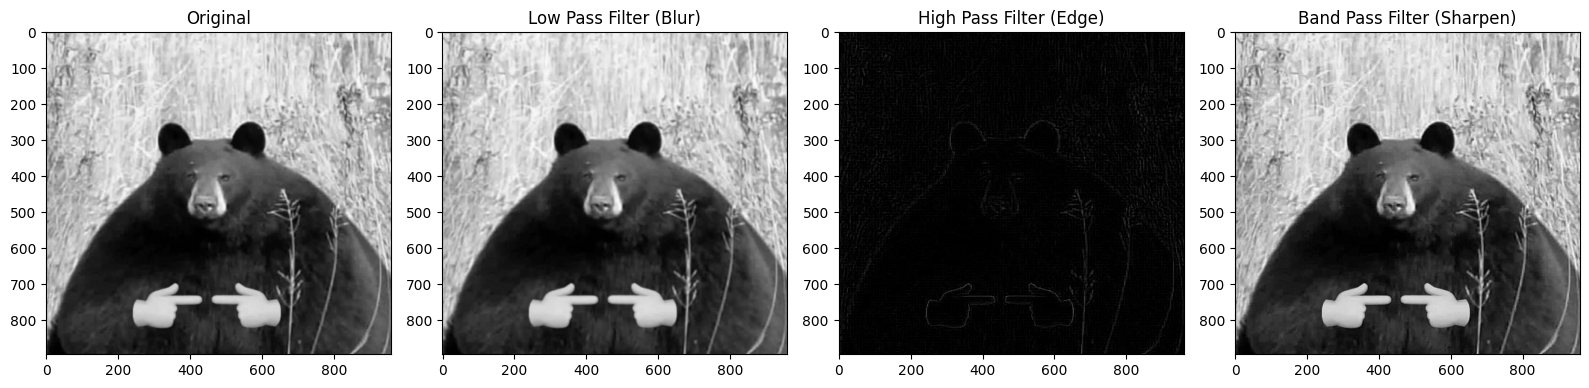

Rata-rata nilai piksel:
Original : 126.08
LPF      : 126.07
HPF      : 5.05
BPF      : 126.10


True

In [ ]:
# ======================================
# SOAL 2 - Konvolusi dengan Filter Kernel
# ======================================


import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra grayscale
img = cv2.imread('bear.jpeg', cv2.IMREAD_GRAYSCALE)

# 2. Definisikan kernel
LPF = (1/9) * np.ones((3, 3), np.float32)
HPF = np.array([[-1, -1, -1],
                [-1,  8, -1],
                [-1, -1, -1]], np.float32)
BPF = np.array([[0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]], np.float32)

# 3. Terapkan filter (konvolusi)
lpf_result = cv2.filter2D(img, -1, LPF)
hpf_result = cv2.filter2D(img, -1, HPF)
bpf_result = cv2.filter2D(img, -1, BPF)

# 4. Tampilkan hasil dalam satu figure
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')

axes[1].imshow(lpf_result, cmap='gray')
axes[1].set_title('Low Pass Filter (Blur)')

axes[2].imshow(hpf_result, cmap='gray')
axes[2].set_title('High Pass Filter (Edge)')

axes[3].imshow(bpf_result, cmap='gray')
axes[3].set_title('Band Pass Filter (Sharpen)')

plt.tight_layout()
plt.show()

# 5. Analisis nilai rata-rata
print("Rata-rata nilai piksel:")
print(f"Original : {np.mean(img):.2f}")
print(f"LPF      : {np.mean(lpf_result):.2f}")
print(f"HPF      : {np.mean(hpf_result):.2f}")
print(f"BPF      : {np.mean(bpf_result):.2f}")

# Simpan hasil
cv2.imwrite('hasil_LPF.jpg', lpf_result)
cv2.imwrite('hasil_HPF.jpg', hpf_result)
cv2.imwrite('hasil_BPF.jpg', bpf_result)
